In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [18]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [28]:
import pandas as pd
import numpy as np
data=pd.read_csv('Datasets/MNIST/mnist_784_csv.csv')
data.head()
data.shape

(70000, 785)

In [29]:
x_data = data.iloc[:, :-1]  # First 784 columns as features
y_data = data.iloc[:, -1]   # Last column as labels
from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test=train_test_split(x_data, y_data, test_size=0.14285)

In [30]:
# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [31]:
# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [32]:
# Clip the pixel values to stay between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [22]:
# Build the autoencoder
input_img = layers.Input(shape=(28, 28, 1))

In [23]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)


In [24]:
# Decoder

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [25]:
# Compile the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [26]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 90s 350ms/step - loss: 0.3379 - val_loss: 0.1286
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 321ms/step - loss: 0.1254 - val_loss: 0.1161
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 222ms/step - loss: 0.1161 - val_loss: 0.1117
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 52s 220ms/step - loss: 0.1122 - val_loss: 0.1087
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 256ms/step - loss: 0.1094 - val_loss: 0.1074
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 262ms/step - loss: 0.1074 - val_loss: 0.1056
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 241ms/step - loss: 0.1065 - val_loss: 0.1046
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 236ms/step - loss: 0.1054 - val_loss: 0.1038
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 340ms/step - loss: 0.1044 - val_loss: 0.1028
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 240ms/step - loss: 0.1036 - val_loss: 0.1021


In [28]:
# Denoise test images
denoised_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


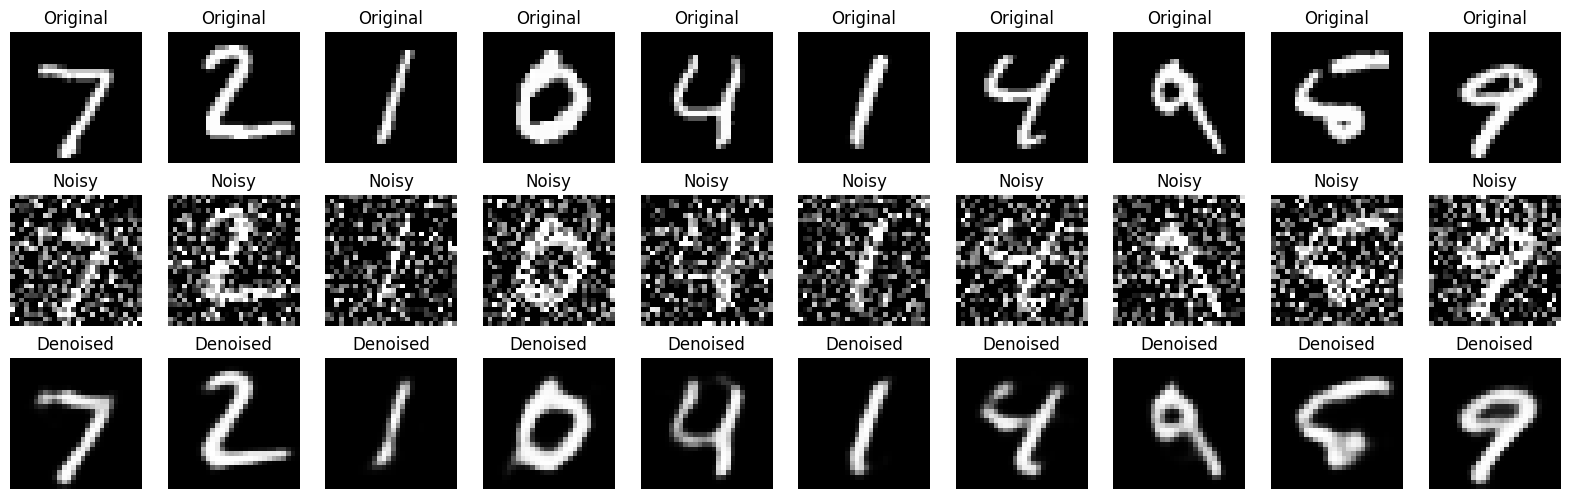

In [29]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("Datasets/MNIST/mnist_784_csv.csv")

In [6]:
data = df.iloc[: , :-1]
labels = df.iloc[: , -1]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [14]:
x_train=x_train/255.
x_test = x_test/255.

In [13]:
x_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.0,56000.0,56000.0,56000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000667,0.000352,0.000159,0.000045,0.000060,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021419,0.016186,0.009587,0.004702,0.006762,0.001407,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.988235,0.733333,0.996078,0.243137,0.0,0.0,0.0,0.0


In [18]:
import numpy as np
x_train = np.reshape(x_train, (len(x_train), 28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28,28,1))

In [22]:
noise_factor= 0.5
noisy_x_train = x_train + noise_factor*np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
noisy_x_test = x_test + noise_factor* np.random.normal(loc=0.0, scale=1.0, size= x_test.shape)